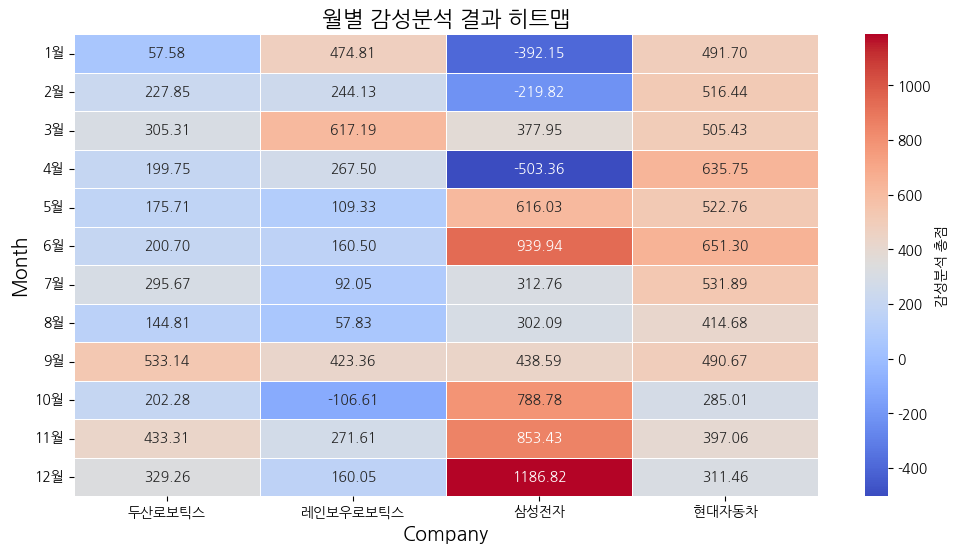

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

months = ['1월', '2월', '3월', '4월', '5월', '6월',
           '7월', '8월', '9월', '10월', '11월', '12월']
companies = ["레인보우로보틱스", "삼성전자", "현대자동차", "두산로보틱스"]

sentiment_result_rb = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023.csv")
sentiment_result_ss = pd.read_csv("../data/project/predicted_삼성전자_2023.csv") 
sentiment_result_hv = pd.read_csv("../data/project/predicted_현대차_2023.csv") 
sentiment_result_ds = pd.read_csv("../data/project/predicted_두산로보틱스_2023.csv") 

sentiment_result_rb['date'] = pd.to_datetime(sentiment_result_rb['date'])
sentiment_result_rb['month'] = sentiment_result_rb['date'].dt.month
sentiment_result_ss['date'] = pd.to_datetime(sentiment_result_ss['date'])
sentiment_result_ss['month'] = sentiment_result_ss['date'].dt.month
sentiment_result_hv['date'] = pd.to_datetime(sentiment_result_hv['date'])
sentiment_result_hv['month'] = sentiment_result_hv['date'].dt.month
sentiment_result_ds['date'] = pd.to_datetime(sentiment_result_ds['date'])
sentiment_result_ds['month'] = sentiment_result_ds['date'].dt.month

sentiment_results = [sentiment_result_rb,sentiment_result_ss,
                     sentiment_result_hv,sentiment_result_ds]

# 감성분석 데이터프레임
sentiments_data = []
for i, sent in enumerate(sentiment_results):
    for index, row in sent.iterrows():
        month = row['month']
        prediction = row['prediction']
        score = row['score']
        sentiments_data.append([month, companies[i], prediction, score])

sentiments_df = pd.DataFrame(sentiments_data, columns=['month', 'company', 'prediction', 'score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df['total'] = sentiments_df['prediction'].map(weights) * sentiments_df['score']
sentiments_df['month'] = sentiments_df['month'].astype(str) + '월'

df_monthly_total = sentiments_df.groupby(['month', 'company'])['total'].sum().unstack()
df_monthly_total = df_monthly_total.reindex(months)

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(df_monthly_total, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': '감성분석 총점'})
plt.title('월별 감성분석 결과 히트맵', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.yticks(rotation=0)
plt.show()